In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
from decimal import Decimal
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
    
%matplotlib notebook

### GDP data

In [997]:
file ='20210416.xls'
GDP_df = pd.read_excel(file, index_col=0)
GDP_df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2.6,1.2,3.9,-5,4,4.5,4.5,4,4,4
Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,9.8,...,3.8,4.1,2.2,-3.5,5,4,4,3.5,3.5,3.5
Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,...,1.3,1.2,0.8,-6,2.9,2.7,1.1,1,1,1.1
Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,0,...,-0.2,-2,-0.6,-4,0.4,2.4,3.5,3.8,3.9,3.7
Antigua and Barbuda,8.2,3.8,-0.1,5.4,10.2,7.6,11.5,6.6,5.2,5.3,...,3.1,7,3.4,-17.3,-3,11.9,6.3,5.9,3.9,3


In [998]:
ChinaGDP    =GDP_df.loc["China, People's Republic of","2015":"2019"]
SingaporeGDP=GDP_df.loc["Singapore","2015":"2019"]
ThailandGDP =GDP_df.loc["Thailand","2015":"2019"]
GDP_China_df=pd.DataFrame(ChinaGDP)
GDP_Singapore_df=pd.DataFrame(SingaporeGDP)
GDP_Thailand_df=pd.DataFrame(ThailandGDP)
A_df=pd.merge(GDP_China_df, GDP_Singapore_df, how='outer', left_index=True, right_index=True)
GDP_All_df=pd.merge(A_df, GDP_Thailand_df, how='outer', left_index=True, right_index=True)
GDP_All_df=GDP_All_df.T
GDP_df=GDP_All_df.rename(index={"China, People's Republic of":'China'}).head()
GDP_df.head()

,2015,2016,2017,2018,2019
China,7,6.9,6.9,6.7,5.8
Singapore,3,3.3,4.5,3.5,1.3
Thailand,3.1,3.4,4.2,4.2,2.3


### Happiness Data

In [971]:
HP2015_df = pd.read_csv('HP2015.csv', index_col=0)
HP2016_df = pd.read_csv('HP2016.csv', index_col=0)
HP2017_df = pd.read_csv('HP2017.csv', index_col=0)
HP2018_df = pd.read_csv('HP2018.csv', index_col=1)
HP2019_df = pd.read_csv('HP2019.csv', index_col=1)

In [972]:
HP2015_df.drop(columns=['Region', 'Happiness Rank','Standard Error','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'], axis=1,inplace=True)
HP2015_df= HP2015_df.rename(columns={'Happiness Score': '2015'})

HP2016_df.drop(columns=['Region', 'Happiness Rank','Lower Confidence Interval','Upper Confidence Interval','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'], axis=1,inplace=True)
HP2016_df= HP2016_df.rename(columns={'Happiness Score': '2016'})

HP2017_df.drop(columns=['Happiness.Rank','Whisker.high','Whisker.low','Family','Health..Life.Expectancy.','Freedom','Trust..Government.Corruption.','Generosity','Dystopia.Residual'], axis=1,inplace=True)
HP2017_df= HP2017_df.rename(columns={'Happiness Score': '2017'})

HP2018_df.drop(columns=['Overall rank','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Generosity','Perceptions of corruption'], axis=1,inplace=True)
HP2018_df= HP2018_df.rename(columns={'Happiness Score': '2018'})

HP2019_df.drop(columns=['Overall rank','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Generosity','Perceptions of corruption'], axis=1,inplace=True)
HP2019_df= HP2019_df.rename(columns={'Happiness Score': '2019'})

In [995]:
HP_df=pd.merge(HP2015_df, HP2016_df, how='left', on='Country')
HP_df=pd.merge(HP_df, HP2017_df, how='left', on='Country')
HP_df=pd.merge(HP_df, HP2018_df, how='left', on='Country')
HP_df=pd.merge(HP_df, HP2019_df, how='left', on='Country')
HP_df

,2015,2016,2017,2018,2019
Country,,,,,
Switzerland,7.587,7.509,7.494,7.487,7.480
Iceland,7.561,7.501,7.504,7.495,7.494
Denmark,7.527,7.526,7.522,7.555,7.600
Norway,7.522,7.498,7.537,7.594,7.554
Canada,7.427,7.404,7.316,7.328,7.278
...,...,...,...,...,...
Rwanda,3.465,3.515,3.471,3.408,3.334
Benin,3.340,3.484,3.657,4.141,4.883
Syria,3.006,3.069,3.462,3.462,3.462


In [996]:
ChinaHP    =HP_df.loc["China","2015":"2019"]
SingaporeHP=HP_df.loc["Singapore","2015":"2019"]
ThailandHP =HP_df.loc["Thailand","2015":"2019"]
HP_China_df=pd.DataFrame(ChinaHP)
HP_Singapore_df=pd.DataFrame(SingaporeHP)
HP_Thailand_df=pd.DataFrame(ThailandHP)
B_df=pd.merge(HP_China_df, HP_Singapore_df, how='outer', left_index=True, right_index=True)
HP_All_df=pd.merge(B_df, HP_Thailand_df, how='outer', left_index=True, right_index=True)
HP_All_df=HP_All_df
HP_All_df.head()
HP_df=HP_All_df.T.rename(index={"China, People's Republic of":'China'}).head()
HP_df.head()

,2015,2016,2017,2018,2019
China,5.140,5.245,5.273,5.246,5.191
Singapore,6.798,6.739,6.572,6.343,6.262
Thailand,6.455,6.474,6.424,6.072,6.008


<IPython.core.display.Javascript object>


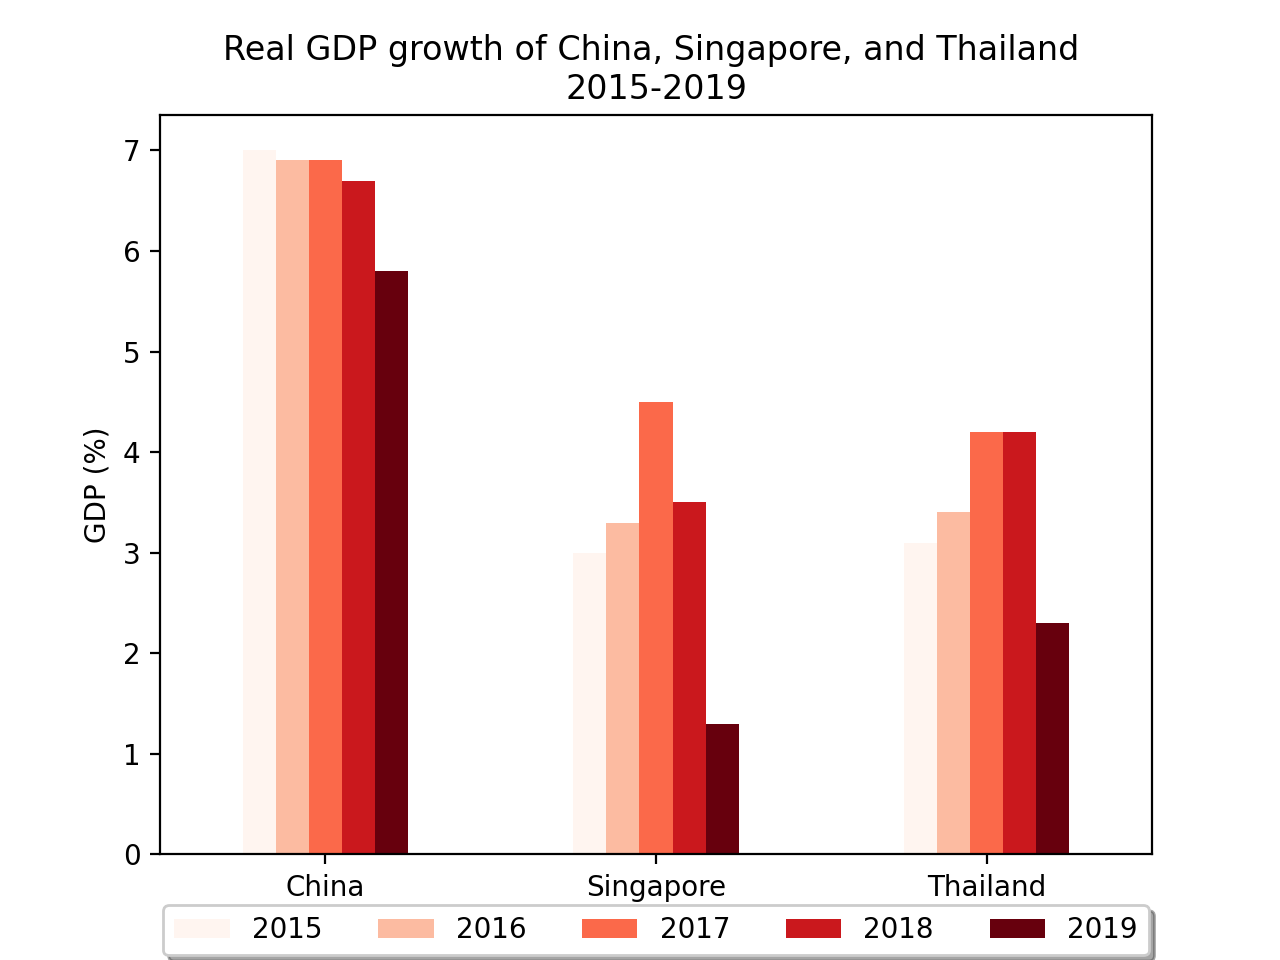

<IPython.core.display.Javascript object>


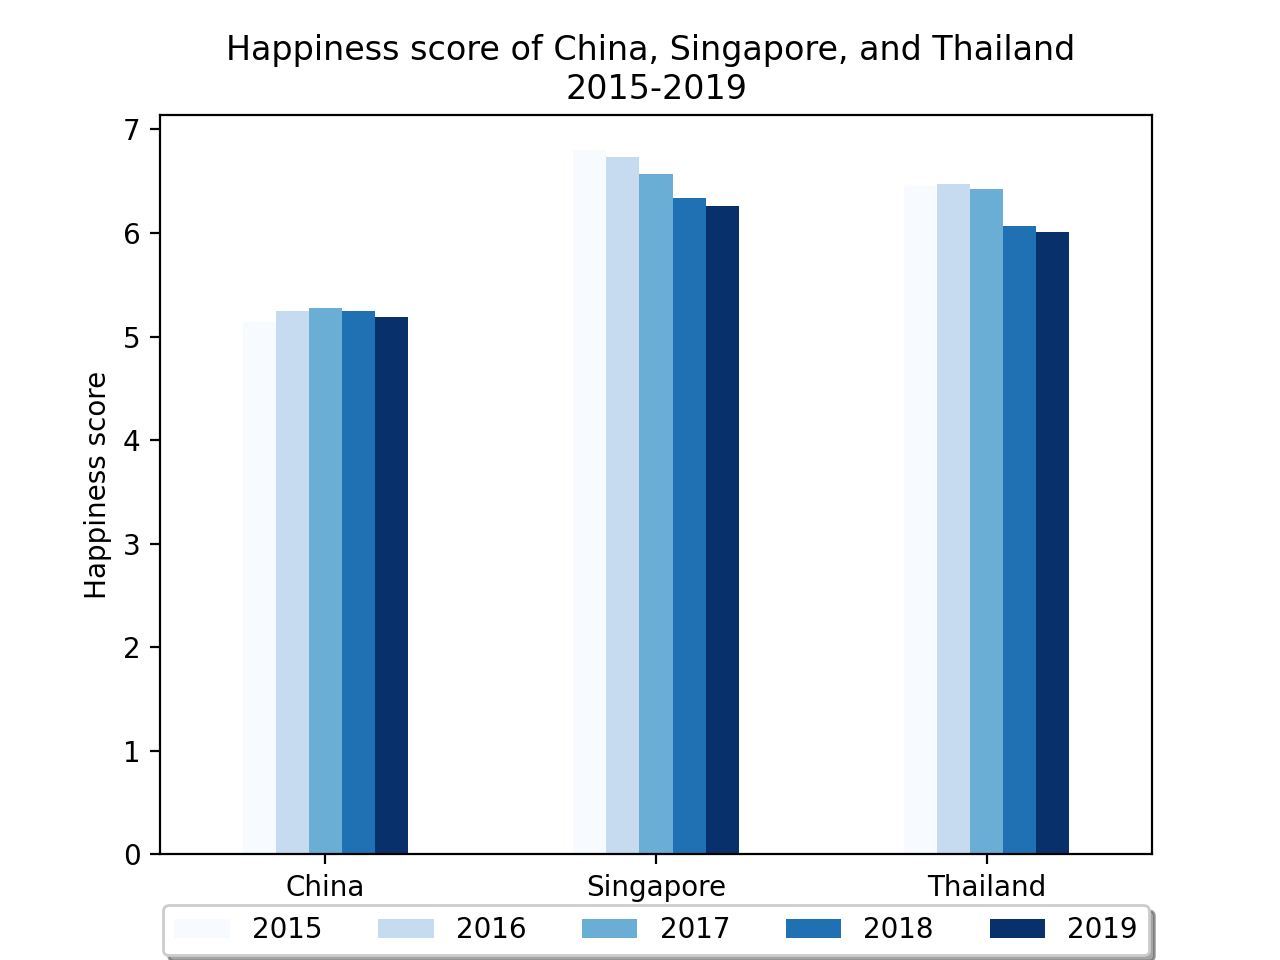

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

In [1083]:

gspec.update(hspace=6, wspace=6)

ax = GDP_df.plot.bar(colormap="Reds")
ax.set_title('Real GDP growth of China, Singapore, and Thailand \n2015-2019')
ax.set_ylabel('GDP (%)')
ax.set_xlabel('Country')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.xticks(rotation=0)

ax1 = HP_df.plot.bar(colormap="Blues")
ax1.set_title('Happiness score of China, Singapore, and Thailand \n2015-2019')
ax1.set_xlabel('Country')
ax1.set_ylabel('Happiness score')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.xticks(rotation=0)

In [ ]:
ax1 = HP_df.plot.bar(colormap="Blues")
ax.set_title('Adjusted Median Family Income Ann Arbor vs. Michigan\n2005-2015')
ax.set_xlabel('Michigan')
ax.set_ylabel('Ann Arbor')